# Apprentice Challenge

This challenge is diagnostic of your current python pandas, matplotlib/seaborn, and numpy skills. These diagnostics will help inform your selection into the Machine Learning Guild's Apprentice program. Please ensure you are using Python 3 as the notebook won't work in 2.7

## Challenge Background: AirBnB Price Prediction



![SegmentLocal](airbnbland.gif "https://media.giphy.com/media/jdEMZDHtKNBpFAv1ud/giphy-downsized-large.gif")

AirBnB is a popular technology platform that serves as an online marketplace for lodging. Using AirBnB, homeowners (called "hosts") can  rent out their properties to travelers. Some hosts rent out their properties in full (e.g. an entire house or apartment), whereas some rent out individual rooms separately. Units are rented out for various durations, anywhere from one night up to a month or more, with some hosts specifying a minimum number of nights required for a rental.

Over time, this platform has proven to be a powerful competitor to the traditional hotel and bed & breakfast industries, often competing on price, convenience, comfort, and/or the unique nature of its listed properties. 

The company is constantly onboarding new rental hosts in NYC, and many of these hosts don’t have any idea how much customers would be willing to pay for their rental units. AirBnB has hired you, an analytics consultant, to use their historical NYC rental data and build a predictive model that their new hosts in the city can use to get a sense of what to charge.

In this data analysis programming challenge, you’ll have to clean the data, engineer some new modeling features, and finally, build and test the predictive model.


## Instructions

You need to know your way around `pandas` DataFrames and basic Python programming. You have **2 hours** to complete the challenge. We strongly discourage searching the internet for challenge answers.

Your first task:
* Read the first paragraph above to familiarize yourself with the topic.
* Feel free to poke around with the iPython notebook.
* When you are ready, proceed to the next task.
* Complete each of the tasks listed below in the notebook.
* You need to provide your code for challenge in the cells which say "-- YOUR CODE FOR TASK NUMBER --"

**NOTE: After each Jupyter cell in which you will enter your code, there is an additional cell that will check your outputs. If your outputs are incorrect, this will be printed out for your awareness, and the correct outputs will be loaded in so that you can continue with the assessment. That being said, if you feel you are able to correct your code so that it generates the correct outputs, you should do so in order to get as many points as possible.**

**Please reach out to [Lauren Moy](mailto:lmoy@deloitte.com) with any questions.**

In [2]:
# Import packages
import pandas as pd
import numpy as np
import data_load_files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

# Task 1

**Instructions**

AirBnB just sent you the NYC rentals data as a text file (`AB_NYC_2019_pt1.csv`). First, we'll need to read that text file in as a pandas DataFrame called `df`. As it turns out, AirBnB also received an additional update (`AB_NYC_2019_pt2.csv`) overnight to add to the main dataset, so you'll have to read that in and append it to the main DataFrame as well.

Next, to better understand the data, print the first 10 rows of the DataFrame, then print the data types of the DataFrame's columns


**Expected Output**
* (1pt) Read in the main data file as `df`, a pandas DataFrame and load in the second data file as `df2`
* (1pt) Append the new data file to `df`
* (1pt) Print the first 10 rows of the df and the datatypes of the df

In [3]:
# Task 1

# -- YOUR CODE FOR TASK 1 --

#Import primary AirBnB data file as a pandas DataFrame
df = pd.read_csv("AB_NYC_2019_pt1.csv")



#Import the additional AirBnB data file as a pandas DataFrame and append it to the primary data DataFrame
df2 = pd.read_csv("AB_NYC_2019_pt2.csv")


#Append df2 to df
df = df.append(df2)


#Print the first 10 rows of the df, and print the data types of the df's columns
# Your code here

print(df.head(10))
print(df.dtypes)


                                               name  host_id    host_name  \
0                Clean & quiet apt home by the park     2787         John   
1                             Skylit Midtown Castle     2845     Jennifer   
2               THE VILLAGE OF HARLEM....NEW YORK !     4632    Elisabeth   
3                   Cozy Entire Floor of Brownstone     4869  LisaRoxanne   
4  Entire Apt: Spacious Studio/Loft by central park     7192        Laura   
5         Large Cozy 1 BR Apartment In Midtown East     7322        Chris   
6                                   BlissArtsSpace!     7356        Garon   
7                  Large Furnished Room Near B'way      8967     Shunichi   
8                Cozy Clean Guest Room - Family Apt     7490    MaryEllen   
9                Cute & Cozy Lower East Side 1 bdrm     7549          Ben   

  neighbourhood_group       neighbourhood  latitude  longitude  \
0            Brooklyn          Kensington  40.64749  -73.97237   
1           Manhatta

In [4]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.

task_1_check = data_load_files.TASK_1_OUTPUT
task_1_shape = task_1_check.shape
task_1_columns = task_1_check.columns

if df.shape == task_1_shape and list(df.columns) == list(task_1_columns):
    print('df is correct')
else:    
    df = task_1_check
    print("'`df' is incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

df is correct


# Task 2, Part 1
**Instructions**

AirBnB is aware that some of its listings are missing values. Let's see if we can determine how much of the dataset is affected. Start by printing out the number of rows in the df that contain any null (NaN) values.

Once you've done that, drop those rows from the df before any further analysis is conducted.

One of your fellow analytics consultants who was also exploring this data has been having trouble with their analysis. It seems to be due to a data type mismatch. In particular, they need the `last_review` column to be of type Datetime. Convert that column to Datetime for your teammate.


**Expected Output**

- (1pt) Correct number of rows that conain any null (NaN) values stored in a variable `num_nan`
- (1pt) Updated DataFrame `df` where all rows that contain any NaNs have been dropped
- (1pt) Updated DataFrame `df` where the dtype of column `last_review` is `datetime`


In [5]:
# Task 2 (Part 1)

# Import packages
import datetime


# -- YOUR CODE FOR TASK 2 (PART 1) --

#Print out the number of rows in the df that contain any null (NaN) values
num_nan = len(df[df.isna().any(axis=1)])
print(num_nan)

#Drop all rows with any NaNs from the DataFrame
# Your code here
df = df.dropna()

#Convert the ‘last_review’ column to DateTime
# Your code here

df['last_review'] = df['last_review'].astype('datetime64[ns]')
print (df.dtypes)

10074
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object


In [6]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.

## Checks
task_2_part_1_check = data_load_files.TASK_2_PART_1_OUTPUT

shape_check = (df.shape == task_2_part_1_check.shape)
columns_check = (list(df.columns) == list(task_2_part_1_check.columns))
type_check = (type(df['last_review']) == type(task_2_part_1_check['last_review']))

if shape_check and columns_check and type_check:
    print('df is correct')
else:    
    df = task_2_part_1_check
    print("'`df' is incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

df is correct


# Task 2, Part 2

**Instructions**

Airbnb team wants to further explore the expansion of their listings in the Neighbourhood Group of Brooklyn. Create a DataFrame `df_brooklyn` containing only these listings, and then, using that DataFrame, create a new DataFrame `df_brooklyn_prices_room_type` showing the mean price per room type, which will help them determine the room types that generate the highest revenue.

AirBnB also wants to understand which neighbourhoods in the Brooklyn neighbourhood group are most common among its listings. Create a pandas Series `top_10_brooklyn_series` that contains the top 10 most common neighborhoods (as the index) in Brooklyn and the number of listings each represents.

**Expected Output**
- (1pt) A DataFrame `df_brooklyn` that only contains listings in Brooklyn. Don't forget to reset the index if needed
- (1pt) Create a dataframe `df_brooklyn_prices_room_type` showing the average (mean) prices of the listings for each room type in Brooklyn. This new DataFrame should contain only three columns: `neighbourhood_group`,`room_type`, and `price`. Don't forget to reset the index, if needed.
- (1pt) A Series `top_10_brooklyn_series` that contains the number of listings for only the top 10 most common neighborhoods in Brooklyn

In [7]:
# Run this cell 
pd.set_option('mode.chained_assignment', None)

In [8]:
df.head(10)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [9]:
# Task 2 (Part 2)

# -- YOUR CODE FOR TASK 2 (PART 2) --


#Create a pandas DataFrame containing only listings in the Brooklyn neighborhood group. Don't forget to reset the index!
df_brooklyn = df[df['neighbourhood_group'] == "Brooklyn"]
df_brooklyn.reset_index()

#Printing Results
df_brooklyn

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
15,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,40.68969,-73.93285,Private room,68,1,1,2019-07-06,1.00,3,127
4631,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,2,2019-07-06,2.00,1,87
4696,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2019-07-08,2.00,1,14
4735,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230


In [10]:
#Create a dataframe showing the average (mean) prices of the listings in Brooklyn
df_brooklyn_prices_room_type = df_brooklyn.groupby(['neighbourhood_group', 'room_type']).agg({'price': 'mean'}).reset_index()
df_brooklyn_prices_room_type.columns = ['neighbourhood_group','room_type','price']
#Printing Results
df_brooklyn_prices_room_type


,neighbourhood_group,room_type,price
0,Brooklyn,Entire home/apt,171.281897
1,Brooklyn,Private room,73.349562
2,Brooklyn,Shared room,45.458621


In [11]:
#Create a pandas Series showing the number of listings for each of the top 10 most common neighbourhoods

top_10_brooklyn_series = df_brooklyn.neighbourhood.value_counts().head(10)
# #Printing Results
top_10_brooklyn_series



Williamsburg                 3163
Bedford-Stuyvesant           3141
Bushwick                     1942
Crown Heights                1265
Greenpoint                    866
Flatbush                      496
Clinton Hill                  480
Prospect-Lefferts Gardens     449
East Flatbush                 426
Park Slope                    410
Name: neighbourhood, dtype: int64

In [12]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.

## Checks
task_2_part_2_top_10_check = data_load_files.TASK_2_PART_2_T10_OUTPUT
task_2_part_2_brooklyn_check = data_load_files.TASK_2_PART_2_BKN_OUTPUT
task_2_part_2_rm_prices_check = data_load_files.TASK_2_PART_2_RM_PRICES_OUTPUT

price_shape_check = (df_brooklyn_prices_room_type.shape == task_2_part_2_rm_prices_check.shape)
price_columns_check = (list(df_brooklyn_prices_room_type.columns) == list(task_2_part_2_rm_prices_check.columns))
price_avg_check = (df_brooklyn_prices_room_type.price.mean() == task_2_part_2_rm_prices_check.price.mean())

brooklyn_shape_check = (df_brooklyn.shape == task_2_part_2_brooklyn_check.shape)

brooklyn_top_10_avg_check = (top_10_brooklyn_series.mean() == task_2_part_2_top_10_check.mean())

if price_shape_check and price_columns_check and price_avg_check and brooklyn_shape_check and brooklyn_top_10_avg_check:
    print('dfs are correct')
else:    
    df_brooklyn_prices_room_type = task_2_part_2_rm_prices_check
    df_brooklyn = task_2_part_2_brooklyn_check
    df_brooklyn['last_review'] = pd.to_datetime(df_brooklyn['last_review'])
    top_10_brooklyn_series = task_2_part_2_top_10_check
    print("df's are incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

dfs are correct


# Task 3, Part 1

**Instructions**

We want to be able to model using the ‘neighbourhood’ column as a feature, but to do so we’ll have to transform it into a series of binary features (one per neighbourhood), and right now there are way too many unique values. To solve this problem, we will re-label all neighbourhoods not in the top 10 neighbourhoods as “Other”. First, you'll create a list of the top 10 most common neighbourhoods in Brooklyn, leveraging the `top_10_brooklyn_series` Series that you created earlier. Then you will replace all neighbourhood values NOT in that list with the value 'Other'.

AirBnB believes that long lags between reviews can be an indicator that the rental unit is less desirable (not being booked often). To enable us to test this later, create a new column representing the number of days it has been since the last review was posted. 

AirBnB believes that ‘Entire home/apt’ rentals in Brooklyn can command a premium; hence, they would like you to separately identify such listings using a new binary column.

**Expected Output**
- (1pt) A list of neighborhoods `top_10_brooklyn_list` that contains the top 10 neighborhoods in brooklyn by largest count of Air BnBs
- (1pt) A column `neighbourhood` that displays the neighbourhood name if it is in the `top_10_brooklyn_list`, otherwise displays "Other"
- (1pt) Calculate the `days_since_review` and add as a column in `df_brooklyn`
- (1pt) Create a binary column `brooklyn_whole` that create a binary indicator based on 'room_type'=='Entire home/apt'


In [17]:
top_10_brooklyn_list = top_10_brooklyn_series.index
top_10_brooklyn_list

df_brooklyn.loc[~df_brooklyn['neighbourhood'].isin(top_10_brooklyn_list),'neighbourhood'] = 'Other'

In [12]:
#Task 3

# -- YOUR CODE FOR TASK 3 --

#Create a list of the top 10 most common neighbourhoods, using the 'top_10_brooklyn_series'
#that you created earlier
top_10_brooklyn_list = top_10_brooklyn_series.index



#Replace all 'neighbourhood' column values NOT in the top 10 with 'Other'
df_brooklyn.loc[~df_brooklyn["neighbourhood"].isin(top_10_brooklyn_list), "neighbourhood"] = 'Other'

# Printing Results
df_brooklyn['neighbourhood'].value_counts()


Other                        3801
Williamsburg                 3163
Bedford-Stuyvesant           3141
Bushwick                     1942
Crown Heights                1265
Greenpoint                    866
Flatbush                      496
Clinton Hill                  480
Prospect-Lefferts Gardens     449
East Flatbush                 426
Park Slope                    410
Name: neighbourhood, dtype: int64

In [13]:
df_brooklyn

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Other,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,Other,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314
15,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,40.68969,-73.93285,Private room,68,1,1,2019-07-06,1.00,3,127
4631,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,2,2019-07-06,2.00,1,87
4696,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2019-07-08,2.00,1,14
4735,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Other,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230


In [14]:
from datetime import date
#Calculate the days_since_review and add as a column in df_brooklyn
current_date = pd.to_datetime(date.today())

df_brooklyn['days_since_review']= (current_date - df_brooklyn['last_review']).dt.days

# Print Results
df_brooklyn

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_review
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Other,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1022
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,763
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,1401
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,Other,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,774
15,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,40.68969,-73.93285,Private room,68,1,1,2019-07-06,1.00,3,127,762
4631,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,2,2019-07-06,2.00,1,87,762
4696,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2019-07-08,2.00,1,14,760
4735,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Other,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230,761


In [15]:
# Create a binary column brooklyn_whole that create a binary indicator based on 'room_type'=='Entire home/apt'
df_dummy = pd.get_dummies(df_brooklyn['room_type'])

df_brooklyn['brooklyn_whole']=df_dummy["Entire home/apt"]

# Printing Results
df_brooklyn

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_review,brooklyn_whole
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Other,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1022,0
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,763,1
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,1401,0
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,Other,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,774,0
15,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,769,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,40.68969,-73.93285,Private room,68,1,1,2019-07-06,1.00,3,127,762,0
4631,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,2,2019-07-06,2.00,1,87,762,0
4696,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2019-07-08,2.00,1,14,760,0
4735,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Other,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230,761,1


In [16]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.

task_3_part_1_check = data_load_files.TASK_3_PART_1_OUTPUT

brooklyn_shape_check = (df_brooklyn.shape == task_3_part_1_check.shape)
brooklyn_columns_check = (list(df_brooklyn.columns) == list(task_3_part_1_check.columns))

if brooklyn_shape_check and brooklyn_columns_check:
    print('df is correct')
else:    
    df_brooklyn = task_3_part_1_check
    print("df is incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

df is correct


# Task 3, Part 2

You want to take a closer look at price in the dataset. You decide to categorize rental properties by their affordability. Categorize each listing into one of three price categories by binning the `price`  column and creating a new `price_category` column using the cut method of pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

In [17]:
price_bins = [0, 100, 200, np.inf]
price_cat = ['low', 'medium', 'high']

#Categorize each listing into one of three price categories by binning the price column
df_brooklyn['price_category'] = pd.cut(df_brooklyn['price'], bins=price_bins, labels=price_cat)


# Printing Results
df_brooklyn


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_review,brooklyn_whole,price_category
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Other,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1022,0,medium
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,763,1,low
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,1401,0,low
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,Other,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,774,0,low
15,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,769,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,40.68969,-73.93285,Private room,68,1,1,2019-07-06,1.00,3,127,762,0,low
4631,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,2,2019-07-06,2.00,1,87,762,0,low
4696,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2019-07-08,2.00,1,14,760,0,low
4735,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Other,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230,761,1,high


In [18]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.

task_3_part_2_check = data_load_files.TASK_3_PART_2_OUTPUT

brooklyn_shape_check = (df_brooklyn.shape == task_3_part_2_check.shape)
brooklyn_columns_check = (list(df_brooklyn.columns) == list(task_3_part_2_check.columns))

if brooklyn_shape_check and brooklyn_columns_check:
    print('df is correct')
else:    
    df_brooklyn = task_3_part_2_check
    print("df is incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

df is correct


# Task 3, Part 3

**Instructions**
* Create a barchart of your dataset `Price Category` from Part 2, comparing the number of rentals in each category.


**Expected Output**
* barchart with listing count as bar
* grouped by 3 price categories


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='price_category'>

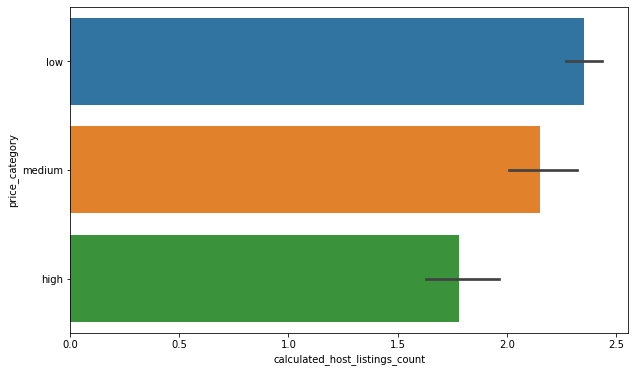

In [19]:
#Create a barchart of your dataset
# Your code here
import seaborn as sns
import matplotlib.pyplot as plt

# Set the width and height of the figure
plt.figure(figsize=(10,6))


# Bar chart showing Listing counts for different price categories
sns.barplot(x=df_brooklyn["calculated_host_listings_count"], y=df_brooklyn["price_category"])



# Task 4, Part 1

**Instructions **

Airbnb's business team would like to understand the revenue the hosts make in Brookyln. As you do not have the Airbnb booking details, you can estimate the number of bookings for each property based on the number of reviews they received. You can then extrapolate each property’s revenue with this formula:

Number of Reviews x Price of Listing x Minimum Length of Stay

This will serve as a conservative estimate of the revenue, since it is likely that properties will have more bookings than reviews. In addition, guests are also likely to stay longer than the minimum number of nights required.

**Expected Output**
- (1pt) Write a function called generate_estimate_host_revenue to calculate the host revenue using the above formula and return the updated dataframe `df_brooklyn` with a new column `estimated_host_revenue` using the function you created
- (1pt) Descriptive Statistics of the `estimated_host_revenue`


In [20]:
# Write a function to calculate the estimated host revenue, update the dataframe with a new column `estimated_host_revenue` calculated using the above formula
# and return the updated dataframe
#Your code here
def generate_estimate_host(num_of_reviews, price_of_listing, min_len_stay):
    return num_of_reviews * price_of_listing * min_len_stay


In [21]:
df_brooklyn

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_review,brooklyn_whole,price_category
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Other,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1022,0,medium
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,763,1,low
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,1401,0,low
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,Other,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,774,0,low
15,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,769,1,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,40.68969,-73.93285,Private room,68,1,1,2019-07-06,1.00,3,127,762,0,low
4631,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,2,2019-07-06,2.00,1,87,762,0,low
4696,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2019-07-08,2.00,1,14,760,0,low
4735,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Other,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230,761,1,high


In [22]:
# Apply your function on `df_brooklyn`
df_brooklyn['estimated_host_revenue'] = df_brooklyn.apply(lambda row : generate_estimate_host(row['number_of_reviews'],row['minimum_nights'],row['price']), axis = 1)

# Printing Results
df_brooklyn  

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_review,brooklyn_whole,price_category,estimated_host_revenue
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Other,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,1022,0,medium,1341
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,763,1,low,24030
6,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,1401,0,low,132300
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,Other,40.66829,-73.98779,Private room,89,4,167,2019-06-24,1.34,3,314,774,0,low,59452
15,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,148,2019-06-29,1.20,1,46,769,1,medium,41440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,Bedford-Stuyvesant,40.68969,-73.93285,Private room,68,1,1,2019-07-06,1.00,3,127,762,0,low,68
4631,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,Bedford-Stuyvesant,40.68914,-73.92408,Private room,33,30,2,2019-07-06,2.00,1,87,762,0,low,1980
4696,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,Bedford-Stuyvesant,40.69551,-73.93951,Private room,45,1,2,2019-07-08,2.00,1,14,760,0,low,90
4735,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Other,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230,761,1,high,1650


In [23]:
#Use the describe() function column `estimated_host_revenue` to generate descriptive statistics which includes 
# the summary of the central tendency, dispersion and shape of the numerical column.

#Your code here
df_brooklyn['estimated_host_revenue'].describe()

count    1.643900e+04
mean     1.486955e+04
std      1.019379e+05
min      0.000000e+00
25%      7.495000e+02
50%      2.730000e+03
75%      1.020000e+04
max      7.046000e+06
Name: estimated_host_revenue, dtype: float64

In [24]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.

task_4_part_1_check  = data_load_files.TASK_4_PART_1_OUTPUT 

brooklyn_shape_check = (df_brooklyn.shape == task_4_part_1_check.shape)
brooklyn_columns_check = (list(df_brooklyn.columns) == list(task_4_part_1_check.columns))
brooklyn_est_host_rev_mean_check = (df_brooklyn['estimated_host_revenue'].mean() == task_4_part_1_check['estimated_host_revenue'].mean())
brooklyn_est_host_rev_max_check = (df_brooklyn['estimated_host_revenue'].max() == task_4_part_1_check['estimated_host_revenue'].max())

if brooklyn_shape_check and brooklyn_columns_check and brooklyn_est_host_rev_mean_check and brooklyn_est_host_rev_max_check:
    print('df is correct')
else:    
    df_brooklyn = task_4_part_1_check
    print("df is incorrect. You can correct for points, but you will still be able to move on to the next task if not.")



df is correct


# Task 4, Part 2

**Instructions**

The AirBnB team wants more information on average prices of different types of listings. To help them with this, use a pivot table to look at the average (mean) prices for the various room types within each 'neighbourhood'. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table


**Expected Output**

 - (1pt) Correct Pivot Table with `room_type` as column and `neighbourhood` as index
 - (1pt) Fill the cell with 0 if value is null


In [25]:
# YOUR CODE FOR TASK 4, PART 2
Pivot = pd.pivot_table(df_brooklyn, values='price', index=['neighbourhood'],
                    columns=['room_type'], aggfunc=np.mean, fill_value=0)

# Printing Results
Pivot

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Bedford-Stuyvesant,152.197497,68.107230,39.521127
Bushwick,141.564912,62.444611,33.416667
Clinton Hill,230.461279,89.531073,43.666667
Crown Heights,154.754977,66.207705,42.133333
East Flatbush,129.964497,94.815900,45.055556
Flatbush,128.671233,68.265385,57.117647
Greenpoint,187.750000,87.094444,60.300000
Other,173.252732,73.249835,44.738636
Park Slope,196.921569,90.349515,78.000000


# TASK 5, Part 1
**Instructions**

The Airbnb analysts want to know the factors influencing the price. Before proceedeing with Correlation analysis, you need to perform some feature engineering tasks such as converting the categorical columns, dropping descriptive columns.

1. Encode the categorical variable `room_type` and `neighbourhood` using One-Hot Encoding.

Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data. 

Use pandas get_dummies function to create One-Hot Encoding.  

Function syntax : new_dataframe  = pd.get_dummies(dataframe name, columns = [list of categorical columns])

2. Drop the the descriptive columns `name`, `host_id`, `host_name`, `neighbourhood_group`, `latitude` and `longitude` from the dataframe. 

Expected Output

 - (2pt) Dataframe `df_brooklyn_rt` contains 19 columns now.
 - (1pt) Drop descriptive columns `name`, `host_id`, `host_name`, `neighbourhood_group`, `latitude` and `longitude`from the dataframe



In [26]:
# YOUR CODE FOR TASK 5, PART 1
# encode the columnns room_type and neighbourhood

df_brooklyn_rt = pd.get_dummies(df_brooklyn,columns = ['room_type','neighbourhood'])

# Printing Results
df_brooklyn_rt

,name,host_id,host_name,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,...,neighbourhood_Bushwick,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_East Flatbush,neighbourhood_Flatbush,neighbourhood_Greenpoint,neighbourhood_Other,neighbourhood_Park Slope,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Williamsburg
0,Clean & quiet apt home by the park,2787,John,Brooklyn,40.64749,-73.97237,149,1,9,2018-10-19,...,0,0,0,0,0,0,1,0,0,0
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,40.68514,-73.95976,89,1,270,2019-07-05,...,0,1,0,0,0,0,0,0,0,0
6,BlissArtsSpace!,7356,Garon,Brooklyn,40.68688,-73.95596,60,45,49,2017-10-05,...,0,0,0,0,0,0,0,0,0,0
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Laurie,Brooklyn,40.66829,-73.98779,89,4,167,2019-06-24,...,0,0,0,0,0,0,1,0,0,0
15,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,40.70837,-73.95352,140,2,148,2019-06-29,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,Room 3: Cozy Room w Large Closet & Light Break...,268394581,Rehana,Brooklyn,40.68969,-73.93285,68,1,1,2019-07-06,...,0,0,0,0,0,0,0,0,0,0
4631,2-MONTH SUBLEASE (WITH EARLY MOVE-IN),52984497,Friday,Brooklyn,40.68914,-73.92408,33,30,2,2019-07-06,...,0,0,0,0,0,0,0,0,0,0
4696,Comfortable clean Bedstuy private room,267932490,Angela,Brooklyn,40.69551,-73.93951,45,1,2,2019-07-08,...,0,0,0,0,0,0,0,0,0,0
4735,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,40.69827,-73.99649,550,3,1,2019-07-07,...,0,0,0,0,0,0,1,0,0,0


In [27]:
#drop the descriptive columns from the dataframe 
df_brooklyn_rt = df_brooklyn_rt.drop(['name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude','longitude'],axis=1)

# Printing Results
df_brooklyn_rt

,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_review,brooklyn_whole,price_category,...,neighbourhood_Bushwick,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_East Flatbush,neighbourhood_Flatbush,neighbourhood_Greenpoint,neighbourhood_Other,neighbourhood_Park Slope,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Williamsburg
0,149,1,9,2018-10-19,0.21,6,365,1022,0,medium,...,0,0,0,0,0,0,1,0,0,0
3,89,1,270,2019-07-05,4.64,1,194,763,1,low,...,0,1,0,0,0,0,0,0,0,0
6,60,45,49,2017-10-05,0.40,1,0,1401,0,low,...,0,0,0,0,0,0,0,0,0,0
12,89,4,167,2019-06-24,1.34,3,314,774,0,low,...,0,0,0,0,0,0,1,0,0,0
15,140,2,148,2019-06-29,1.20,1,46,769,1,medium,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4529,68,1,1,2019-07-06,1.00,3,127,762,0,low,...,0,0,0,0,0,0,0,0,0,0
4631,33,30,2,2019-07-06,2.00,1,87,762,0,low,...,0,0,0,0,0,0,0,0,0,0
4696,45,1,2,2019-07-08,2.00,1,14,760,0,low,...,0,0,0,0,0,0,0,0,0,0
4735,550,3,1,2019-07-07,1.00,1,230,761,1,high,...,0,0,0,0,0,0,1,0,0,0


In [28]:
df_brooklyn_rt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16439 entries, 0 to 4847
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   price                                    16439 non-null  int64         
 1   minimum_nights                           16439 non-null  int64         
 2   number_of_reviews                        16439 non-null  int64         
 3   last_review                              16439 non-null  datetime64[ns]
 4   reviews_per_month                        16439 non-null  float64       
 5   calculated_host_listings_count           16439 non-null  int64         
 6   availability_365                         16439 non-null  int64         
 7   days_since_review                        16439 non-null  int64         
 8   brooklyn_whole                           16439 non-null  uint8         
 9   price_category                          

In [29]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.
task_5_part_1_check  = data_load_files.TASK_5_PART_1_OUTPUT 

brooklyn_rt_shape_check = (df_brooklyn_rt.shape == task_5_part_1_check.shape)
brooklyn_rt_columns_check = (list(df_brooklyn_rt.columns) == list(task_5_part_1_check.columns))

if brooklyn_rt_shape_check and brooklyn_rt_columns_check:
    print('df is correct')
else:    
    df_brooklyn_rt = task_5_part_1_check
    print("df is incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

df is correct


# Task 5, Part 2
**Instructions**

We will now study the correlation of the features in the dataset with `price`. Use Pandas dataframe.corr() to find the pairwise correlation of all columns in the dataframe. 

Use pandas corr() function to create correlation dataframe.

Function syntax : new_dataframe = Dataframe.corr()

Visualize the correaltion dataframe using a seaborm heatmap. Heatmap is used to plot rectangular data as a color-encoded matrix.
https://seaborn.pydata.org/generated/seaborn.heatmap.html

Expected Output

 - (2pt) Visualize the Correlation matrix using a heatmap
 - (1pt) Correct labels for x and y axis

<AxesSubplot:>

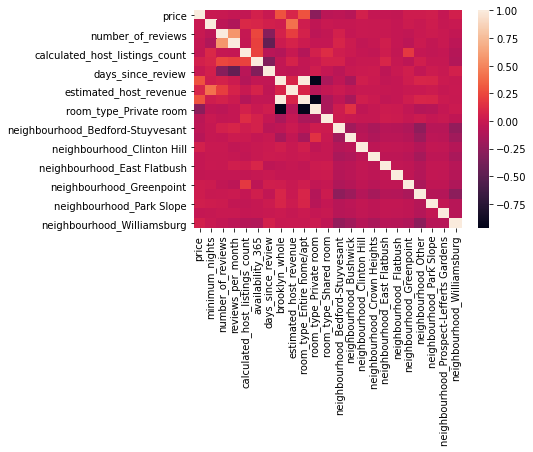

In [30]:
# YOUR CODE FOR TASK 5, PART 2
# create a correlation matix
corr = df_brooklyn_rt.corr()

# plot the heatmap
sns.heatmap(corr,)


**Think about it**: Multicollinearity occurs when your data includes multiple attributes that are correlated not just to your target variable, but also to each other. 

Based on the correlation matrix, **think about** the following:

1. Which columns would you drop to prevent multicollinearity? 
Sample Answer: brooklyn_whole or number_of_reviews
2. Which columns do you find are positively related to the price?
Sample Answer: reviews_per_month


In [31]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.
task_5_part_2_check = data_load_files.TASK_5_PART_2_OUTPUT

corr_shape_check = (corr.shape == task_5_part_2_check.shape)
      
if corr_shape_check:
    print('df is correct')
else:    
    print("df is incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

df is correct


## Task 6

Property Hosts are expected to set their own prices for their listings. Although Airbnb provide some general guidance, there are currently no services which help hosts price their properties using range of data points.

Airbnb pricing is important to get right, particularly in big cities like New York where there is a lot of competition and even small differences in prices can make a big difference. It is also a difficult thing to do correctly — price too high and no one will book. Price too low and you’ll be missing out on a lot of potential income.

Now, let’s try to make a price prediction model using the basic machine learning model from scikit learn. It is a linear regression model that we will use to predict the prices. Import the correct Library

### Task 6, Part 1

**Instructions**

**Preparing the data for training the model**
Based on the correlation plot observations,  we have now identified the features that influence the price of an accomodation. We will prepare the data to train the price prediction model. 

We will create two dataframes 'X' (contains all features influencing the price) and 'Y' (contains the feature price) from `df_brooklyn_rt`. 
1. To create Y, select the `price` column from `df_brooklyn_rt`
2. To create X, drop the columns `price`, `last_review`, `brooklyn_whole`,`price_category` from `df_brooklyn_rt`. We are dropping `brooklyn_whole` as it was causing multicollinearity with `room_type`.

    
**Splitting the data into training and testing sets**

Next, we split the X and Y datasets into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data we use train_test_split function provided by scikit-learn library. We finally print the sizes of our training and test set to verify if the splitting has occurred properly.

**Note**: Please don't change the value for `random_state` in your code, it should set be 5.
    
**Expected Output**
- (1pt) Create dataframe Y from `df_brooklyn_rt`, select only column `price`
- (1pt) Create dataframe X from `df_brooklyn_rt`, do not include columns `price`, `last_review`,` brooklyn_whole` and `price_category`
- (1pt) Split the dataframes X and Y into train and test datasets using the train_test_split function



In [32]:
#Your code here 
X = df_brooklyn_rt.drop(['price','last_review','brooklyn_whole','price_category'],axis=1)
Y = df_brooklyn_rt['price']

print(X)

      minimum_nights  number_of_reviews  reviews_per_month  \
0                  1                  9               0.21   
3                  1                270               4.64   
6                 45                 49               0.40   
12                 4                167               1.34   
15                 2                148               1.20   
...              ...                ...                ...   
4529               1                  1               1.00   
4631              30                  2               2.00   
4696               1                  2               2.00   
4735               3                  1               1.00   
4847               1                  1               1.00   

      calculated_host_listings_count  availability_365  days_since_review  \
0                                  6               365               1022   
3                                  1               194                763   
6                       

In [33]:
#Your code here 
#Please don't change the test_size value it should remain 0.2
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(13151, 21)
(3288, 21)
(13151,)
(3288,)


In [34]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.
task_6_part_1_output_1_check  = data_load_files.TASK_6_PART_1_OUTPUT_1
task_6_part_1_output_2_check  = data_load_files.TASK_6_PART_1_OUTPUT_2
task_6_part_1_output_3_check  = data_load_files.TASK_6_PART_1_OUTPUT_3
task_6_part_1_output_4_check  = data_load_files.TASK_6_PART_1_OUTPUT_4

#X_train
xtrain_shape_check = (X_train.shape == task_6_part_1_output_1_check.shape)
xtrain_columns_check = (list(X_train.columns) == list(task_6_part_1_output_1_check.columns))

#X_test
xtest_shape_check = (X_test.shape == task_6_part_1_output_2_check.shape)
xtest_columns_check = (list(X_test.columns) == list(task_6_part_1_output_2_check.columns))

if xtrain_shape_check and xtrain_columns_check and \
   xtest_shape_check and xtest_columns_check:
    print('dfs are correct')
else:    
    X_train = task_6_part_1_output_1_check
    X_test = task_6_part_1_output_2_check
    Y_train = task_6_part_1_output_3_check
    Y_test = task_6_part_1_output_4_check
    print("dfs are incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

dfs are correct


### Task 6, Part 2

**Instructions**

Training the model
We use scikit-learn’s LinearRegression to train our model. Using the fit() method, we will pass the training datasets X_train and Y_train as arguments to the linear regression model. 

Testing the model
The model has learnt about the dataset. We will now use the trained model on the test dataset, X_test. Using the predict() method, we will pass the test dataset X_Test as an argument to the model.

Expected Output
- (1pt) Pass the training datasets X_train and Y_train to the fit method as arguments
- (1pt) Pass the test dataset X_test to the predict method as argument

In [35]:
#Run this cell
lin_model = LinearRegression()

In [36]:
#Training the model
#Your code here
lin_model.fit(X_train, Y_train)



LinearRegression()

In [37]:
#Testing the model
y_test_predict = lin_model.predict(X_test)
y_test_predict

array([214.24640794, 167.53743582, 202.79213661, ...,  43.86855382,
       160.2353969 , 164.42428646])

In [38]:
#Run this cell
#Model Evaluation
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(round(rmse,3)))
print('R2 score is {}'.format(round(r2,3)))

The model performance for testing set
--------------------------------------
RMSE is 176.637
R2 score is 0.073


In [39]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.
task_6_part_2_check  = data_load_files.TASK_6_PART_2_OUTPUT
round(rmse,3)
rmse_check = (round(rmse,3) == task_6_part_2_check['RMSE'][0])
r2_check = (round(r2,3) == task_6_part_2_check['R2'][0])
if rmse_check and r2_check:
    print('Model evaluation is correct')
else:
    print('Model evaluation is incorrect')
    




Model evaluation is correct


### Task 6, Part 3

**Instructions**

Now we will compare the actual output values for X_test with the predicted values using a bar chart.


- 1(pt) Create a new dataframe <code>lr_pred_df</code> using the <code>Y_test</code> and <code>y_test_predict</code>. Hint: You'll need to flatten your arrays
- 1(pt) Use first 20 records from the dataframe <code>lr_pred_df</code> and plot a bar graph showing comparision of actual and predicted values set Y axis label as 'Price' and Plot title as 'Actual vs Predicted Price'

In [40]:
#Actual Vs Predicted for Linear Regression

lr_pred_df = pd.DataFrame(np.concatenate((y_test_predict.reshape(len(y_test_predict),1), Y_test.values.reshape(len(Y_test),1)),1))
lr_pred_df.columns = ['y_test_predict','actual_values']                     
lr_pred_df

,y_test_predict,actual_values
0,214.246408,150.0
1,167.537436,180.0
2,202.792137,142.0
3,90.375816,35.0
4,67.258770,40.0
...,...,...
3283,75.770446,60.0
3284,196.282825,129.0
3285,43.868554,40.0
3286,160.235397,75.0


(20, 2)


<module 'matplotlib.pyplot' from 'c:\\python38\\lib\\site-packages\\matplotlib\\pyplot.py'>

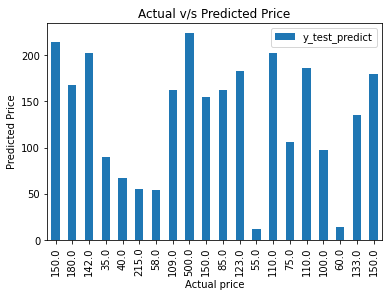

In [41]:
#Your code here
lr_pred_df = lr_pred_df.head(20)
print(lr_pred_df.shape)
lr_pred_df.plot(x='actual_values', y='y_test_predict',kind='bar',title="Actual v/s Predicted Price",ylabel = 'Predicted Price',xlabel = "Actual price") 

# Printing Results
plt

In [44]:
## RUN THIS CELL AS-IS TO CHECK IF YOUR OUTPUTS ARE CORRECT. IF THEY ARE NOT,
## THE APPROPRIATE OBJECTS WILL BE LOADED IN TO ENSURE THAT YOU CAN CONTINUE
## WITH THE ASSESSMENT.
task_6_part_3_check  = data_load_files.TASK_6_PART_3_OUTPUT 

lr_pred_df_shape_check = (lr_pred_df.shape == task_6_part_3_check.shape)

lr_pred_df_columns_check = (list(lr_pred_df.columns) == list(task_6_part_3_check.columns))

if lr_pred_df_shape_check and lr_pred_df_columns_check:
    print('df is correct')
else:    
    lr_pred_df = task_6_part_3_check
    print("df is incorrect. You can correct for points, but you will still be able to move on to the next task if not.")

df is correct
